# 세계 행복 지수를 이용해 그 나라의 GDP 예측하기

In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd

## 데이터 읽어오기

In [25]:
df = pd.read_csv('./datasets/world-happiness-report/2017.csv')
df.shape

(155, 12)

In [26]:
df.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [27]:
df.isna().sum().sum()

0

In [70]:
df.corr()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
Happiness.Rank,1.000000,-0.992774,-0.993058,-0.991533,-0.813244,-0.736753,-0.780716,-0.551608,-0.132620,-0.405842,-0.484506
Happiness.Score,-0.992774,1.000000,0.999497,0.999520,0.812469,0.752737,0.781951,0.570137,0.155256,0.429080,0.475355
Whisker.high,-0.993058,0.999497,1.000000,0.998036,0.811868,0.750934,0.776634,0.569907,0.155462,0.426459,0.478824
Whisker.low,-0.991533,0.999520,0.998036,1.000000,0.812267,0.753767,0.786385,0.569808,0.154904,0.431223,0.471505
Economy..GDP.per.Capita.,-0.813244,0.812469,0.811868,0.812267,1.000000,0.688296,0.843077,0.369873,-0.019011,0.350944,0.024226
Family,-0.736753,0.752737,0.750934,0.753767,0.688296,1.000000,0.612080,0.424966,0.051693,0.231841,0.070506
Health..Life.Expectancy.,-0.780716,0.781951,0.776634,0.786385,0.843077,0.612080,1.000000,0.349827,0.063191,0.279752,0.054963
Freedom,-0.551608,0.570137,0.569907,0.569808,0.369873,0.424966,0.349827,1.000000,0.316083,0.499183,0.081926
Generosity,-0.132620,0.155256,0.155462,0.154904,-0.019011,0.051693,0.063191,0.316083,1.000000,0.294159,-0.116627
Trust..Government.Corruption.,-0.405842,0.429080,0.426459,0.431223,0.350944,0.231841,0.279752,0.499183,0.294159,1.000000,-0.022755


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
Country                          155 non-null object
Happiness.Rank                   155 non-null int64
Happiness.Score                  155 non-null float64
Whisker.high                     155 non-null float64
Whisker.low                      155 non-null float64
Economy..GDP.per.Capita.         155 non-null float64
Family                           155 non-null float64
Health..Life.Expectancy.         155 non-null float64
Freedom                          155 non-null float64
Generosity                       155 non-null float64
Trust..Government.Corruption.    155 non-null float64
Dystopia.Residual                155 non-null float64
dtypes: float64(10), int64(1), object(1)
memory usage: 14.6+ KB


In [29]:
df.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

y = df['Economy..GDP.per.Capita.']
x = df.drop(columns=['Country','Economy..GDP.per.Capita.', 'Happiness.Rank'])
x.shape, y.shape

In [106]:
y = df['Happiness.Score']
x = df.iloc[:, 5:]
x.shape, y.shape

((155, 7), (155,))

x = np.array(x)
y = np.array(y)
x = (x-np.min(x, axis=0)) / (np.max(x, axis=0) - np.min(x, axis=0))
y = (y-np.min(y, axis=0)) / (np.max(y, axis=0) - np.min(y, axis=0))
#x /= np.max(x, axis=0)
#y /= np.max(y, axis=0)
x.shape, y.shape

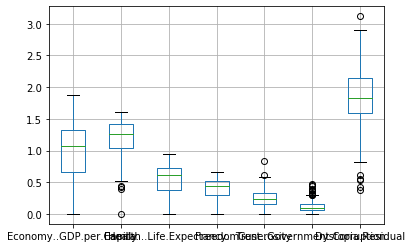

In [107]:
x.boxplot()

In [109]:
y.min(), y.max(), y.mean()

(2.69300007820129, 7.537000179290769, 5.354019355773926)

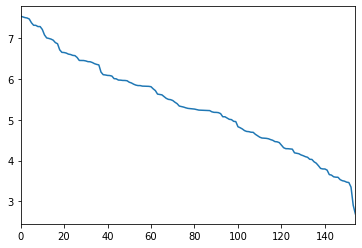

In [110]:
y.plot()

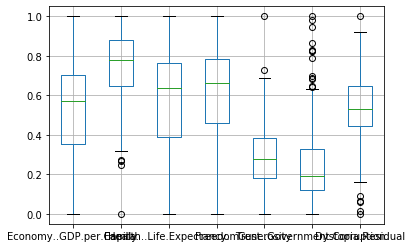

In [111]:
# 정규화
xn = (x - x.min()) / (x.max() - x.min())
xn.boxplot()

In [112]:
xn = np.array(xn)
y = np.array(y)
col = xn.shape[1]
col

7

In [113]:
# 기능(모델) 구현
w = tf.Variable(tf.random_normal(shape=[col])) # 초기값 1.0 으로 두고, 모델이 스스로 조절해나가는 값
b = tf.Variable(0.01)
# hypothesis = tf.reduce_sum(w * x, axis=1) + b #n keepdims는 차원을 줄이지 말아라 명령어
hypothesis = tf.reduce_sum(w * xn, axis=1, keepdims=True) + b #n keepdims는 차원을 줄이지 말아라 명령어
regularization = tf.reduce_mean(tf.abs(w)) #가중치가 커지지 않도록 규제함
print(hypothesis)
# MSE 오차
cost = tf.reduce_mean((y - hypothesis) **2) + 0.01 * regularization
learning_rate = 0.002 # 학습률
# 경사하강법으로 오차를 최소화해라
train = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Tensor("add_16:0", shape=(155, 1), dtype=float32)


In [114]:
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # 변수 초기화를 통해 메모리 할당해줌(malloc과 동일)
sess.run(cost)

16.61053

In [115]:
for i in range(5000): # 에포크 : 변수를 몇번 업데이트 하느냐
    sess.run(train)
    if i%1000==0:
        print(i, sess.run(cost))

0 16.258444
1000 1.8798478
2000 1.685893
3000 1.5696539
4000 1.4980375


In [116]:
sess.run(hypothesis)

array([[5.958909 ],
       [5.9577627],
       [6.206311 ],
       [5.8384457],
       [5.877323 ],
       [5.921608 ],
       [5.925856 ],
       [5.9999194],
       [5.821467 ],
       [5.95047  ],
       [5.84534  ],
       [5.9199877],
       [5.7750387],
       [5.822437 ],
       [5.8635964],
       [5.7547817],
       [5.671147 ],
       [5.5591087],
       [5.805566 ],
       [5.631387 ],
       [5.4671702],
       [5.8002167],
       [5.655717 ],
       [5.7420363],
       [5.4818015],
       [5.281704 ],
       [5.897421 ],
       [5.6368566],
       [5.8163643],
       [5.6828794],
       [5.4325624],
       [6.0367174],
       [5.5700626],
       [5.6254077],
       [5.2314606],
       [5.749091 ],
       [5.356716 ],
       [5.7558084],
       [5.2987604],
       [5.5863523],
       [5.3337836],
       [5.6154923],
       [5.6727867],
       [5.4544516],
       [5.416466 ],
       [5.5515842],
       [5.9808455],
       [5.4098415],
       [5.5699215],
       [5.506792 ],


In [117]:
sess.run([w, b])

[array([-0.01376688,  1.9247066 , -0.18724555,  0.3412516 ,  0.7764359 ,
        -0.13286938,  0.85251546], dtype=float32), 3.1299205]

In [118]:
np.round(sess.run(hypothesis))

array([[6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [5.],
       [6.],
       [6.],
       [6.],
       [5.],
       [5.],
       [6.],
       [6.],
       [6.],
       [6.],
       [5.],
       [6.],
       [6.],
       [6.],
       [5.],
       [6.],
       [5.],
       [6.],
       [5.],
       [6.],
       [5.],
       [6.],
       [6.],
       [5.],
       [5.],
       [6.],
       [6.],
       [5.],
       [6.],
       [6.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [6.],
       [5.],
       [6.],
       [6.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [6.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],

In [119]:
import matplotlib.pyplot as plt

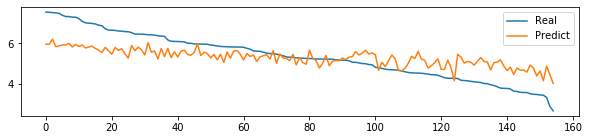

In [120]:
p = sess.run(hypothesis)
plt.figure(figsize=(10, 2))
plt.plot(y[:], label='Real')
plt.plot(p[:], label='Predict')
plt.legend()

In [75]:
#규제 없이
sess.run(w)

array([ 0.13194461,  0.16729736,  0.13525759, -0.1297911 , -0.20949869,
        0.10619556, -1.0716667 ,  0.5960012 , -0.30736187], dtype=float32)

In [90]:
# w = 0.0001
sess.run(w)

array([-0.5647594 , -0.79867333, -0.7525215 ,  1.7507774 ,  0.56859946,
        0.30023763, -0.18464063,  0.370493  ,  0.37840855], dtype=float32)

In [99]:
# w = 0.01
sess.run(w)

array([-0.8492452 ,  0.08109784, -0.46385497,  0.33111513,  0.1134421 ,
        0.52583116,  0.78430474, -0.15314782,  1.3941789 ], dtype=float32)

In [77]:
x.columns

Index(['Happiness.Score', 'Whisker.high', 'Whisker.low', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')